# Day 08: Blue

For this category, I wanted to continue to explore PyGMT. Naturally, the color blue makes me think of water. Therefore, I'll be looking at bathymetry!

There are a variety of data sources I will use throughout these exercises, including:
* [Explorer Basemap](https://visibleearth.nasa.gov/images/147190/explorer-base-map): Joshua Stevens, NASA Earth Observatory
* [Comprehensive Global Administrative Zones (CGAZ)](https://www.geoboundaries.org/): geoBoundaries 4.0, William & Mary geoLab
* [Marine polys and lakes](https://www.naturalearthdata.com/): Natural Earth
* [World Cities](https://simplemaps.com/data/world-cities): Simple Maps

Data sources specific to a single day will be linked in the notebook where they appear.

## Configuration

In [1]:
import os
import pygmt
import numpy as np
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Choose bounding box of interest

# Philippines
place = "PHL"
lons = [115, 130]
lats = [5, 19]

# New Zealand / Aotearoa
# place = "NZL"
# lons = [164, 180]
# lats = [-48, -34]

# Iceland
# place = "ISL"
# lons = [-28, -9]
# lats = [60, 69]

# Jamaica
# place = "JAM"
# lons = [-79, -75]
# lats = [16.5, 19.5]

# Create map using PyGMT

grdblend [NOTICE]: Remote data courtesy of GMT data server OCEANIA [https://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 30x30 arc seconds from Gaussian Cartesian filtering (1.0 km fullwidth) of SRTM15+V2.1 [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 15x15 degree grid tile (earth_relief_30s_p): N00E105


Min elevation -10157.5; Max elevation 0.0
Plotting contours on range: [-10200  -9500  -8800  -8100  -7400  -6700  -6000  -5300  -4600  -3900
  -3200  -2500  -1800  -1100   -400]


grdcontour [WARNING]: No contours found
grdcontour [WARNING]: No contours found
grdcontour [WARNING]: No contours found


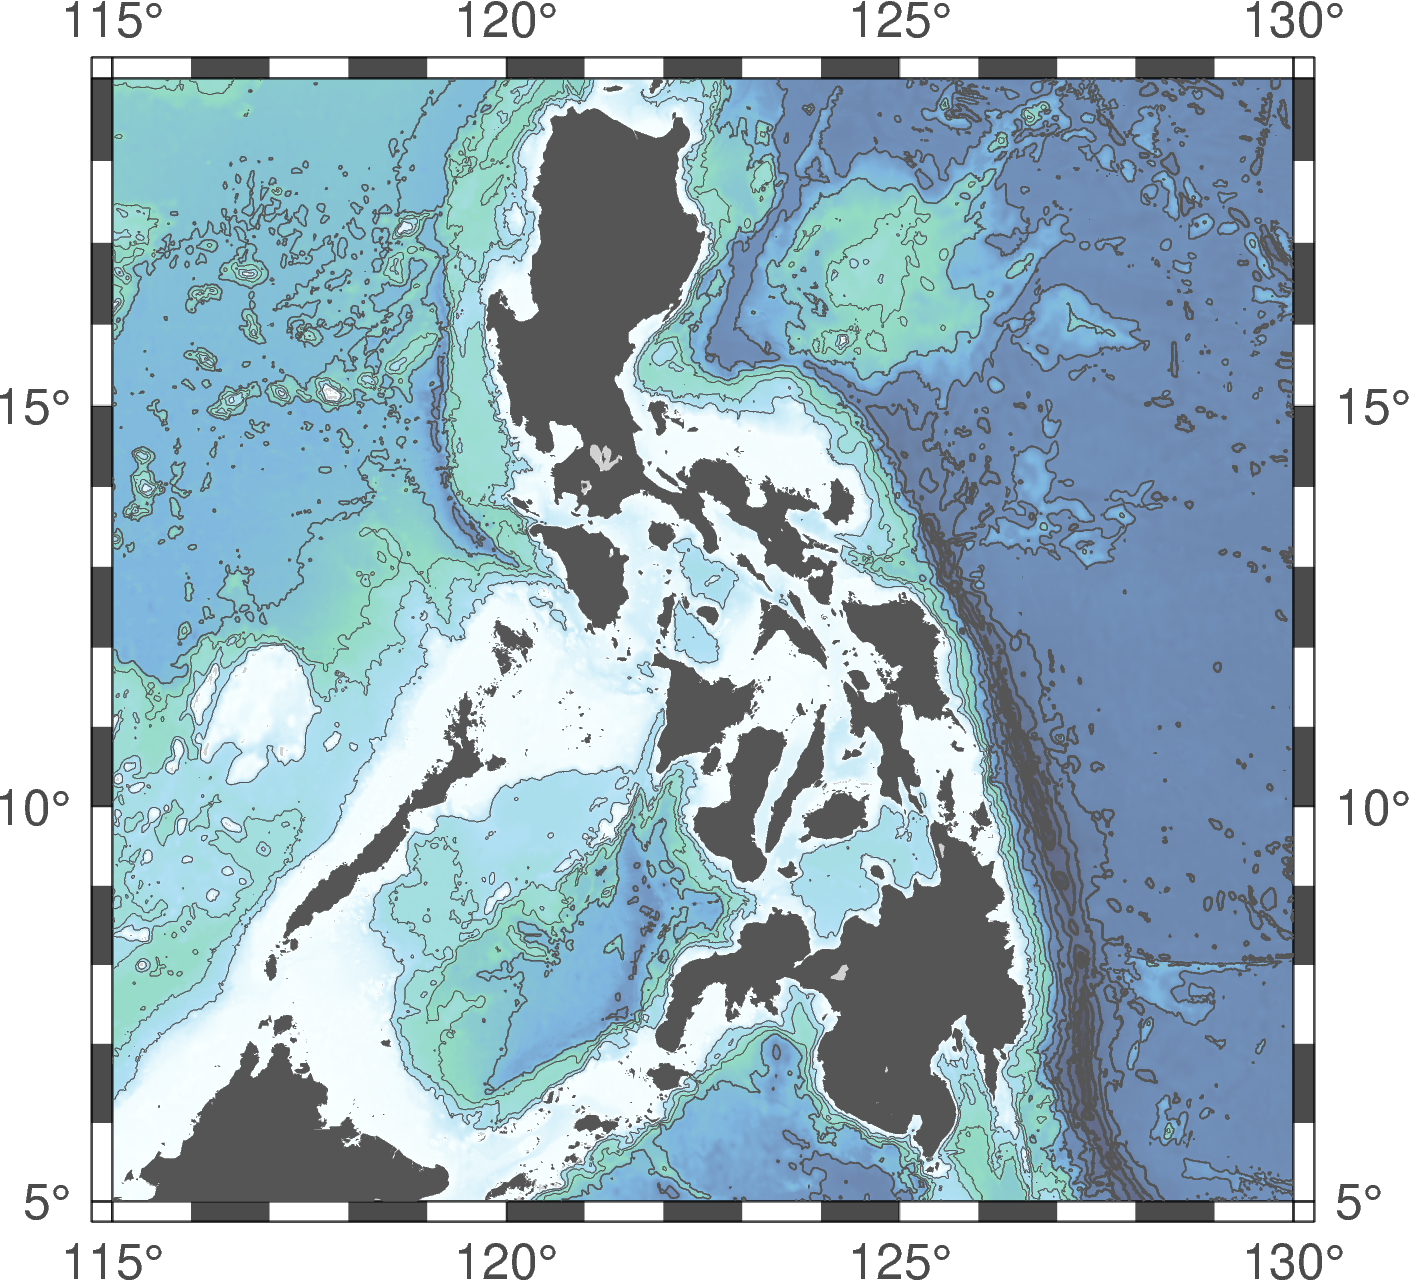

In [3]:
# Set the region for the plot to be slightly larger than the data bounds.
region = [
    lons[0],
    lons[1],
    lats[0],
    lats[1],
]

# Load sample earth relief data
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)

# Mask land values
grid.values[grid.values > 0] = float('nan')
print(f"Min elevation {float(grid.min())}; Max elevation {float(grid.max())}")

# Round up to nearest 100
def roundup(x):
    return int(math.ceil(x / 100.0)) * 100

# Get elevation range values
start = -1*roundup(abs(float(grid.min())))
stop = 0
n = 15
incr = roundup(abs(start)/n)
grid_range = np.arange(start, stop, incr)
n_range = grid_range.shape[0] - 1
print(f"Plotting contours on range: {grid_range}")

# Construct plot
fig = pygmt.Figure()

# Background
fig.grdimage(
    grid=grid,
    cmap="bathy",
    projection="M10c",
    frame=True,
    transparency=30,
)

# Add coastlines
fig.coast(land="#555555", projection="M10c")

# Contour lines
pygmt.makecpt(cmap='bathy', series=(start, stop, n_range))
for i in range(n_range):
    # Get pen width
    w = f"{((n-i)/n)**2}"
    # Plot
    fig.grdcontour(
        grid=grid,
        interval=1000,
        pen=f"{w}p,#555555",
        limit=[grid_range[i], grid_range[i+1]]
    )
    
# Save figure
out_folder = os.path.join("..", "contributions")
out_file = f"08_{place}.png"
out_path = os.path.join(out_folder, out_file)
fig.savefig(out_path, dpi=300)

# Show figure
fig.show()